# 군집화와 차원축소

## 학습 목표
- K평균 군집에서 최적 군집 수와 군집의 중심을 구하는 과정을 설명할 수 있다.
- 군집중심간거리가크고,군집내개체간차이가 작아지는 것이 이상적인 군집임을 설명할 수 있다.
- 군집화를 만들어내는 R 명령어를 사용할 수 있다. 계층적 군집화의 장점과 쓰임새를 설명할 수 있다.
- 주성분분석과 인자분석을 비교할 수 있다. 

## 1. 군집화

### 1 )군집화의 소개

- 좋은군집 : 군집 내 관측치간 유사도가 높고 군집간 유사도는 낮음

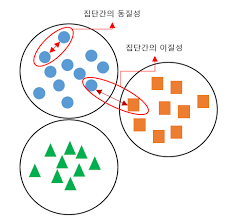

#### 분류(Classification)와 군집화(Clustering)
##### 분류
> 범주의 수 및 각 개체의 범주 정보를 사전에 알 수 있으며, 개체의 입력 변수 값들로부터 범주 정보를 유추하여 새로운 개체에 대해 가장 적합한 범주로 할당하는 문제 (supervised learning)
##### 군집
> 군집의수, 속성, 멤버십 등이 사전에 알려져 있지 않으며 최적의 구분을 찾아가는 문제 (unsupervised learning)

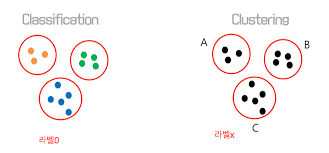

#### 적용사례
- 웹브라우징 시 유사한 문서들을 표시
- 유사한 기능을 수행하는 유전자/단백질집합 
- 유사한 추세를 나타내는 주식종목들 등

#### 군집화 수행 시 고려사항
- 최적의 군집 수 결정
- 측정지표의 유형
    - distance between two clusters
    - diameter of a cluster
    - scatter within a cluster
    
    
- 평가지표1(Dunn Index)
    - 군집간 거리가 멀면 멀수록 군집 내부 분산값이 작을수록 군집화가 잘된것
    - 분자는 군집간 거리의 최소값이며 분모는 군집 내에서 거리의 최대값이라고 볼수있음
- 평가지표2(Elbow Method)
    - 측정지표가 급격히 줄어드는(팔꿈치) 지점의 군집 개수가 가장 최적화된 군집으로 판단
        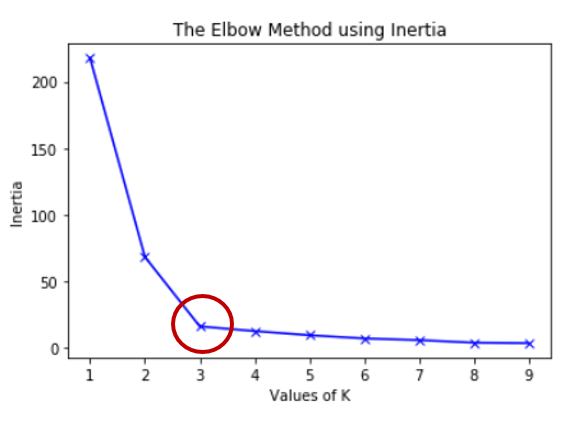
- 평가지표3(Silhouette)
    - 1에 가까울수록 군집화가 잘 되었다고 판단

#### 군집화 종류
- Hard Clustering: 
    서로 겹치지 않는(non-overlapping) 군집 생성, 각 개체는 오직 하나의 군집으로만 할당됨

- Soft Clustering (Fuzzy Clustering): 
    겹치는 군집을 생성하는 것도 가능함. 한 개체는 여러개의 군집에 확률적인 할당이 될수 있음

#### 군집화 알고리즘
- 분리형 알고리즘
    - 전체 데이터의 영역을 특정기준에 의해 동시에 구분
    - 각개체들은사전에정의된 군집수 중 하나에 속하는 결과를 도출함
    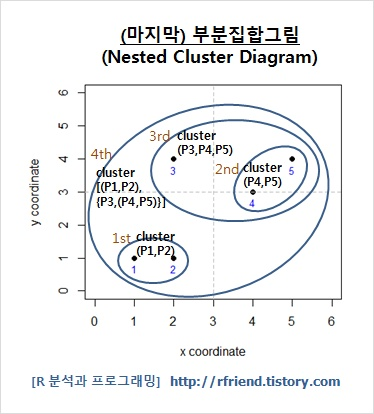
- 계층적 알고리즘
    - 개체들을 가까운 집단부터 차근차근 묶어가는 방식
    - 군집화결과뿐만아니라 유사한 개체들이 결합되는 절차(dendrogram)도 생성
        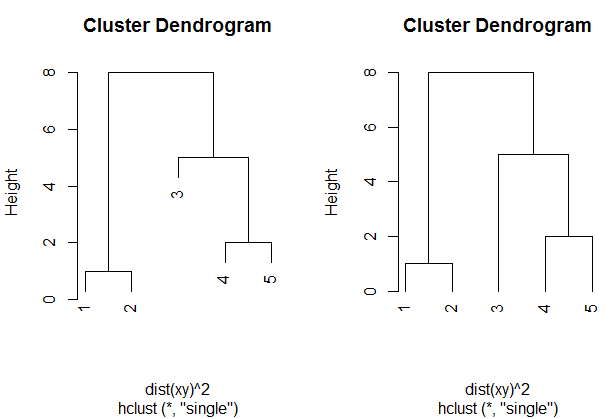
- 자기조직화 지도(SOM)
    - 2차원의 격자에 각 개체들이 대응하도록 인공신경망과 유사한 학습을 통해 군집 도출
        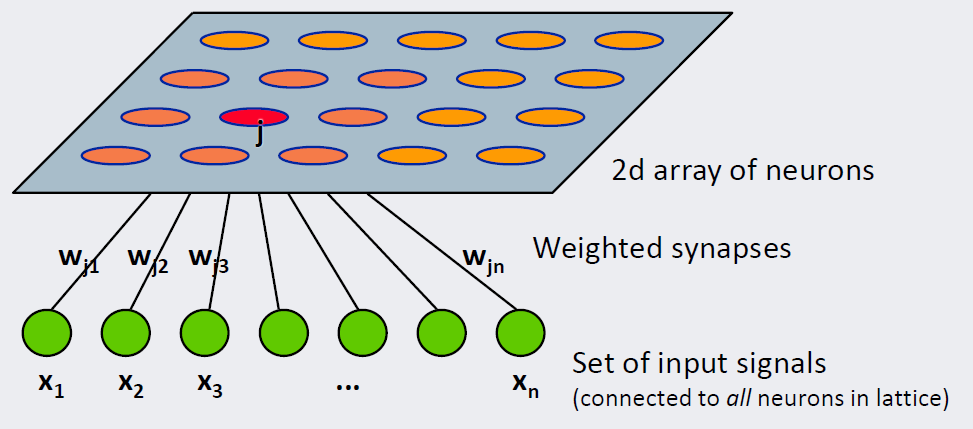
- 밀도기반 군집화
    - 데이터의 분포를 기반으로 높은 밀도를 갖는 세부 영역들로 전체 영역을 구분
        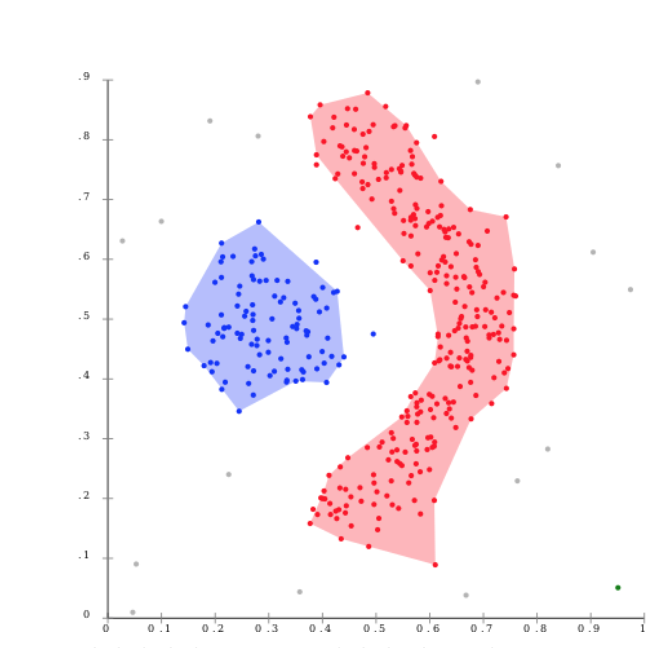

---
### 2 ) K평균 군집
#### 개요
- 개체들을 일정한 기준에 따라 몇 개의 동질적인 그룹으로 나누는 것
- 각군집에 속하는 모든 개체들과 그 군집 중심내의 거리 제곱합(WSS: Withincluster Sum of Square)을 합한 총 거리 제곱합(TWSS: Total Within- cluster Sum of Square)을 최소화하는 방식으로 진행

##### 분석 과정

##### 군집 수 결정과 군집중심 초기화
- n개 데이터에 대해 경험적으로 정하거나, 시뮬레이션을 통해 결정
- 군집의 수는 일반적으로 WSS(오차제곱합) 감소량의 변화가 작아지기 직전의 군집수 로결정

##### 군집화
- 군집중심과각개체간거리계산

##### 군집 중심 내의 거리 제곱합(WSS) 계산
##### 각 군집의 중심 계산
##### 반복 종료 여부 확인

- 새롭게 구성된 군집의 중심이 이전 단계와 차이가 있으면 군집화와 군집 중심계산 과정 반복
- 군집중심의변화가없으면 반복을종료하고군집확정

##### R을 이용한 실습 과정

###### 1. 데이터 작성

In [4]:
id <- 1:10

In [5]:
x <- c(2,20,20,5,12,4,15,27,25,16)

In [8]:
y <- c(20,18,5,28,25,15,5,10,4,12)

In [10]:
data <- data.frame(ID=id , 식료품=x , 의료=y)
data

ID,식료품,의료
<int>,<dbl>,<dbl>
1,2,20
2,20,18
3,20,5
4,5,28
5,12,25
6,4,15
7,15,5
8,27,10
9,25,4


###### 2. 데이터 분포 파악

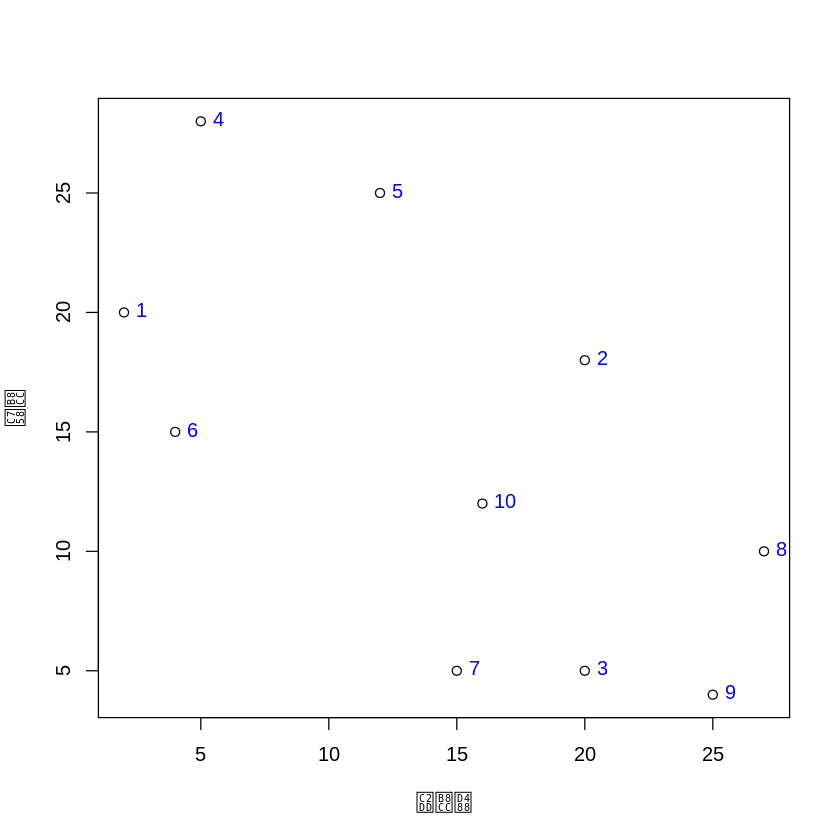

In [15]:
plot(data[,2],data[,3],xlab="식료품" , ylab="의료")
text(data[,2],data[,3],labels=data[,1],pos=4, col = "blue")

###### 3. 데이터 표준화

In [18]:
data.scale <- as.data.frame(scale(data[,-1], center = TRUE, scale = TRUE))
data.scale

식료품,의료
<dbl>,<dbl>
-1.43652527,0.6816457
0.61565369,0.4465955
0.61565369,-1.0812311
-1.09449544,1.6218467
-0.29642585,1.2692713
-1.20850539,0.0940201
0.04560398,-1.0812311
1.41372328,-0.4936055
1.18570340,-1.1987563


###### 4. 데이터 분포 파악

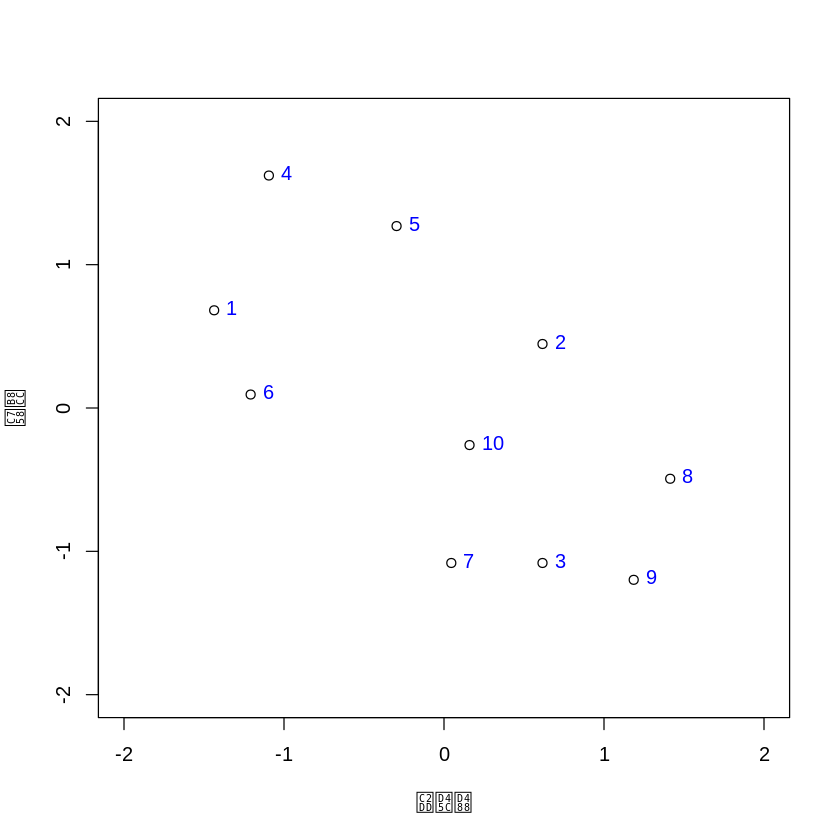

In [19]:
plot(data.scale$`식료품` , data.scale$`의료`,
    xlab="식표품", ylab="의료",
    xlim=c(-2,2), ylim=c(-2,2))
text(data.scale$`식료품` , data.scale$`의료`,labels=data$ID ,pos=4, col = "blue")

###### 5. 군 집합

In [21]:
k <- 2
kc <- kmeans(data.scale, centers = k)
class(kc)
kc

[1] "kmeans"

K-means clustering with 2 clusters of sizes 6, 4

Cluster means:
      식료품       의료
1  0.6726587 -0.6111306
2 -1.0089880  0.9166960

Clustering vector:
 [1] 2 1 1 2 2 2 1 1 1 1

Within cluster sum of squares by cluster:
[1] 3.519502 2.091243
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

##### R을 이용한 실습 결과 해석
```
K-means clustering with 2 clusters of sizes 6, 4
```
- 6과 6개로 재체로 구성되는 두개의 군집으로 분류됨


```
Cluster means:
      식료품       의료
1  0.6726587 -0.6111306
2 -1.0089880  0.9166960
```
- 2개 군집의 중심 좌표

```
Clustering vector:
 [1] 2 1 1 2 2 2 1 1 1 1

```
- 각 고객의 군집

```
Within cluster sum of squares by cluster:
[1] 3.519502 2.091243
```
- WSS

```
 (between_SS / total_SS =  68.8 %)
```
- 군집 중신 간 거리가 크로 군집내 개체간 차이가 작아지먄 이상적인 군집으로서 100%에 수렴


| 분석결과변수 	| 설명 	|
|-	|-	|
| cluster 	| 클러스터 구성 개체 	|
| centers 	| 클러스터 중심 	|
| totss 	| 총 제곱합 	|
| withiness 	| 클러스터 내 제곱합 	|
| tot.withiness 	| 총 클러스터 내 제곱합 	|
| betweenss 	| 클러스터 간 제곱합 	|
| size 	| 각 클러스터의 개체 수 	|
| iter 	| 반복 횟수 	|
| ifault 	| 알고리즘 실행결과, 0인 경우 정상 종료 	|

###### 6. 군집 수의 변화에 따른 withinss 의 변화

In [31]:
twss <- NULL

In [32]:
for(i in 1:9){
    kc <- kmeans(data.scale, centers = i)
    twss <- c(twss, kc$tot.withinss)
}

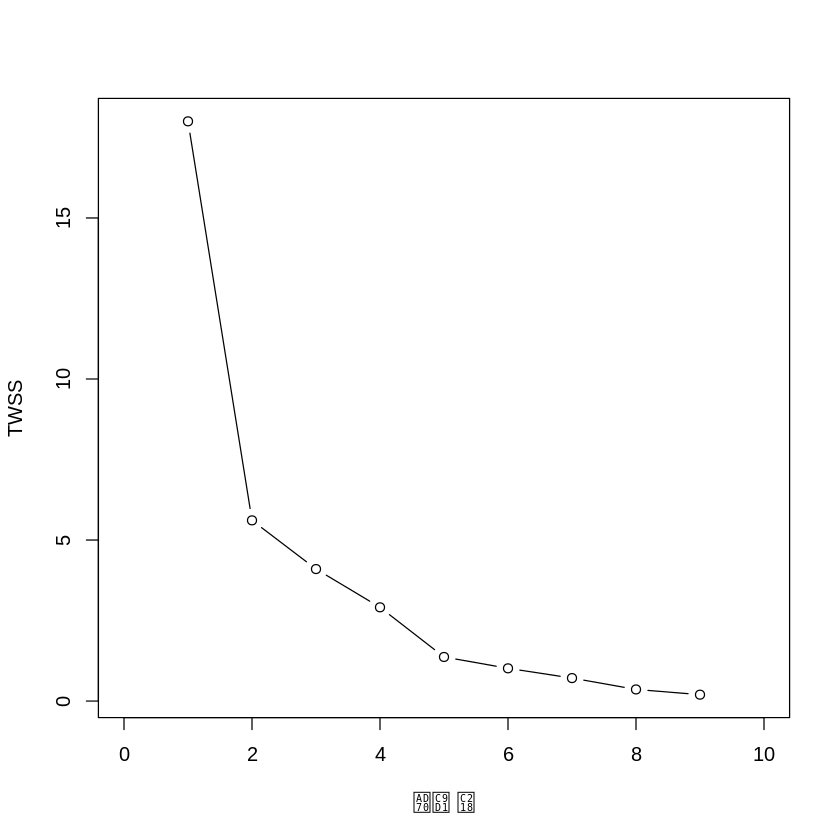

In [34]:
plot(1:9 , twss,
    xlim=c(0,10), type="b",
    xlab="군집 수", ylab="TWSS")

- twss 가 작을수록 군집도가 높아짐
- 크게 차이가 나지 않는 선에서 찾는것이 중요함

### 3) K-Medoids 군집법
#### K평균 군집과의 차이
- K평균 군집:  임의의 좌표를 중심점으로 잡음
- K-Medoids 군집법 : 실제점 하나를 잡아서 계산수행
- K-Medoids군집법
    - PAM(PartitioningAroundMedoids)알고리즘사용
    - 주어진데이터를임의의그룹수로분류하여그래프로표현하는 과정이더쉬움

##### R을 이용한 실습
###### 2) K-Medoids

In [35]:
install.packages("fpc")

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘cluster’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [36]:
library(fpc)

In [50]:
iris2 <- iris[,1:4]
head(iris2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [39]:
pamk_result <- pamk(iris2)
pamk_result

$pamobject
Medoids:
      ID Sepal.Length Sepal.Width Petal.Length Petal.Width
[1,]   8          5.0         3.4          1.5         0.2
[2,] 127          6.2         2.8          4.8         1.8
Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2
Objective function:
    build      swap 
0.9901187 0.8622026 

Available components:
 [1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
 [6] "clusinfo"   "silinfo"    "diss"       "call"       "data"      

$nc
[1] 2

$crit
 [1] 0.0000000 0.6857882 0.5528190 0.4896972 0.4867481 0.4703951 0.3390116
 [8] 0.3318516 0.2918520 0.2918482


In [40]:
pamk_result$nc

[1] 2

In [41]:
table(pamk_result$pamobject$clustering, iris$Species)

   
    setosa versicolor virginica
  1     50          1         0
  2      0         49        50

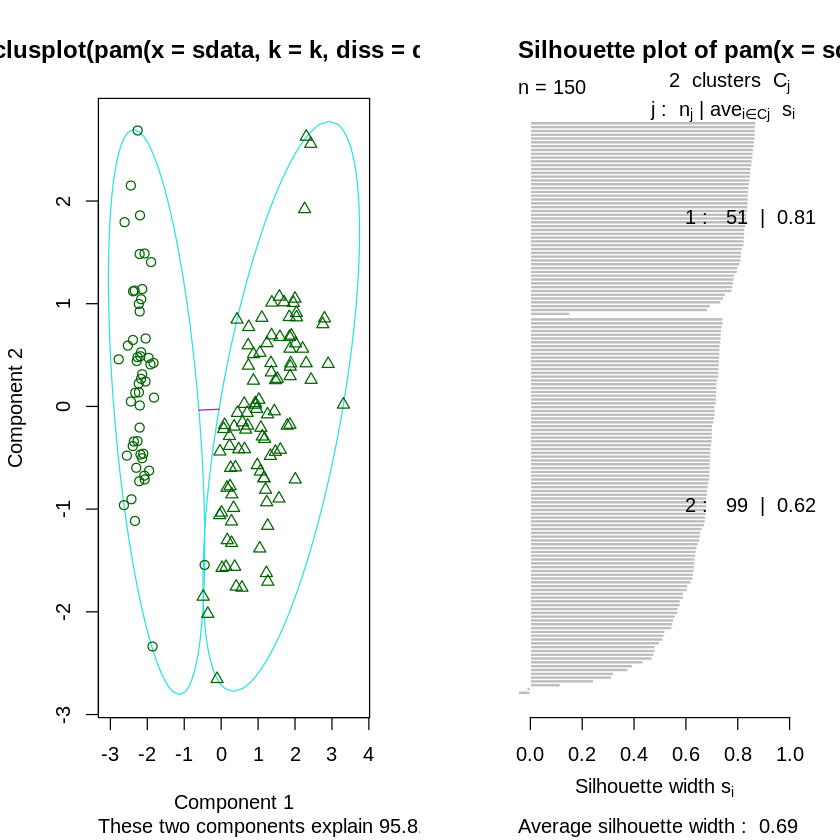

In [47]:
# 레이아웃을 2개로 나누어짐
layout(matrix(c(1,2),1,2))
plot(pamk_result$pamobject)

##### R을 이용한 실습 결과 해석

| 명령어 	| 설명 	|
|-	|-	|
| pamk() 	| K-medoids 군집분석 수행 (fpc 패키지 설치) 	|
| pamobject$nc 	| K-medoids 군집분석결과 군집 수 	|

### 4) 계층적 군집화
#### 개요
- 계층적 트리모형을 이용하여 개별 개체들을 순차적/계층적으로 유사한 개체/군집과 통합
- 덴드로그램 을 통해 시각화 가능
- 사전에군집의수를정하지않아도수행가능
- 특정분야에서는 덴드로그램이 유의미한 계통체계도로 표현되기도 함
    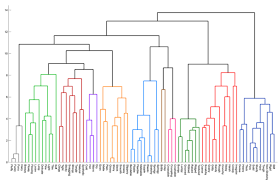

#### 유형
- 병합방법(상향식 군집화)
    - 각 단계에서 유사한 개체/군집들 결합 → 모든 개체들이 하나의 군집으로 통합되면 완료
- 분할방법 (하향식 군집화)
    - 모든 개체가 하나의 군집으로 이루어진 상태에서 출발.
    - 각 단계에서 가장 유의미하게 구분되는 지점을 판별하여 지속적으로 데이터 분할

| 명령어 	| 설명 	|
|-	|-	|
| hcluster() 	| 계층적 군집분석 수행 (method는 “ward.D”, “ward.D2”, “single”,<br>“complete”, “average”(= UPGMA), “mcquitty”(= WPGMA), “median”(= WPGMC) or “centroid”(= UPGMC) 중에서 선택) 	|
| rect.hclust() 	| 결과 그래프를 그룹으로 나누어 표시 	|

In [48]:
idx <- sample(1:dim(iris)[1] , 40)
idx

[1]  22  72  70  45  33 100  73  78  29 106  46 117  82  54 131  76 120  65 148
[20]  25   3 146  14  26  35 111 105  50  83  24  86 113  40 107  37 149  21 147
[39]  15 140

In [49]:
irisSample <- iris[idx,]
head(irisSample)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
22,5.1,3.7,1.5,0.4,setosa
72,6.1,2.8,4.0,1.3,versicolor
70,5.6,2.5,3.9,1.1,versicolor
45,5.1,3.8,1.9,0.4,setosa
33,5.2,4.1,1.5,0.1,setosa
100,5.7,2.8,4.1,1.3,versicolor


In [51]:
irisSample$Species <- NULL

In [54]:
# dist : 거리를 측정하는 메서드
hc_result <- hclust(dist(irisSample) , method = "ave")
hc_result


Call:
hclust(d = dist(irisSample), method = "ave")

Cluster method   : average 
Distance         : euclidean 
Number of objects: 40 


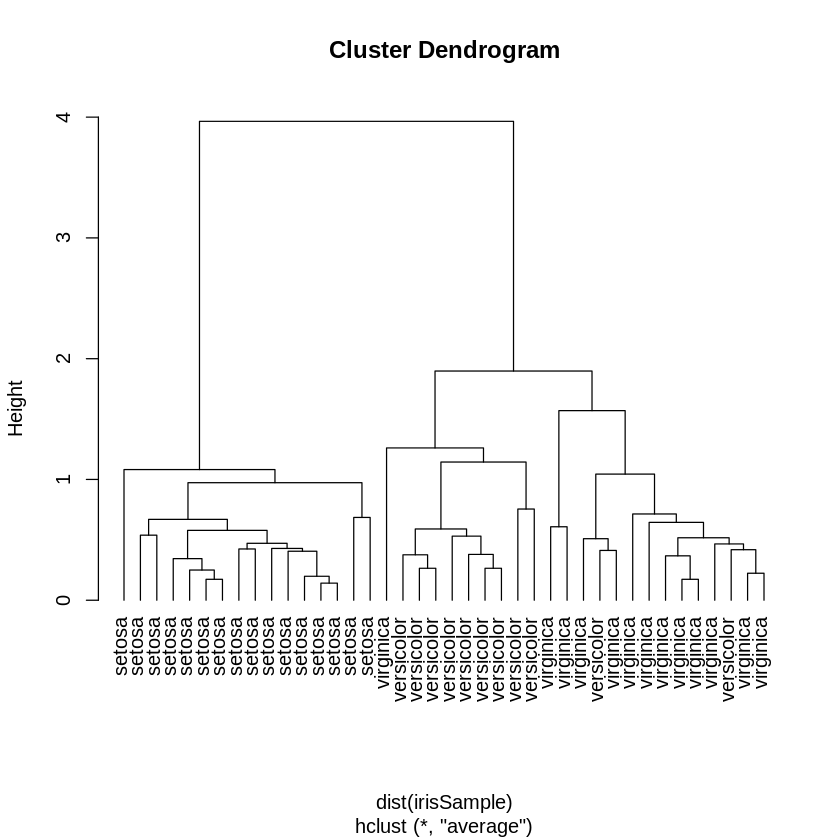

In [66]:
plot(hc_result , hang = -1, labels = iris$Species[idx])

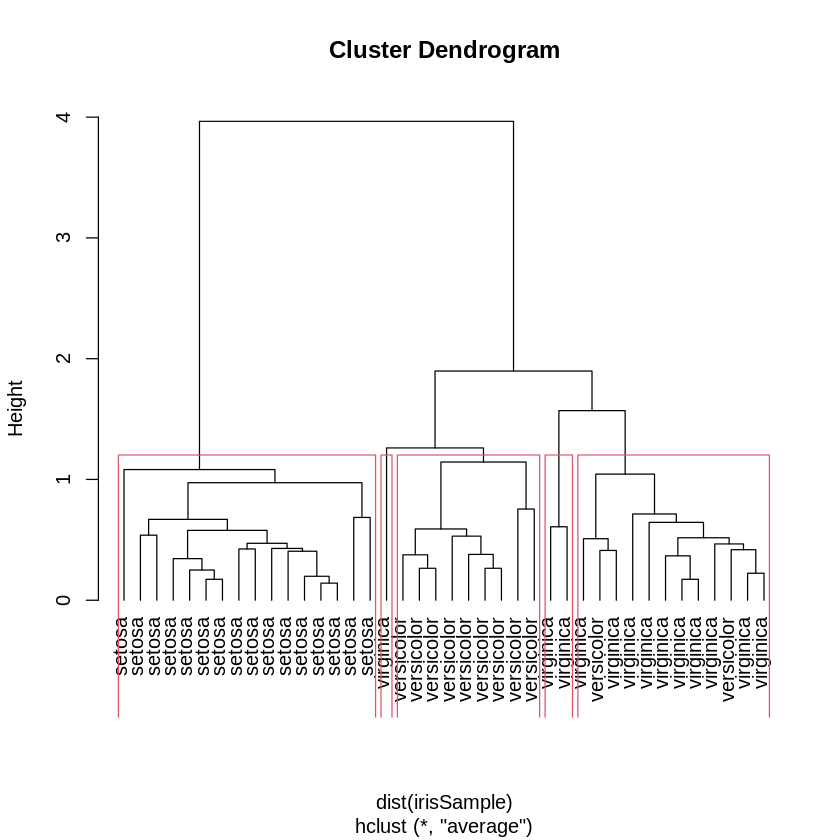

In [67]:
plot(hc_result , hang = -1, labels = iris$Species[idx])
rect.hclust(hc_result, k=5)

## 1. 군집화
### 1) 차원축소개념
#### 개념
- 분석 대상이 되는 변수의 수를 줄이는 과정
- 변수의 수가 많아질수록 이것을 표현하는 모델링이 어려워짐
- 변수의 수를 줄인다는 것은 실제 데이터를 잘 설명할수 있는 잠재 공간(Latent Space)을 찾는 것을 의미

#### 방법

- 특징선택
    - 모든 특징의 부분 집합을 선택해서 간결한 특징 집합을 만드는 것으로 원본 데이터에서 불필요한 특징(변수)을 제거하는 방식
    - ex) 다항 회귀에서 step 명령으로 불필요한 변수를 제거하는 것
- 특징추출
    - 원 데이터의 특징을 조합해서 새로운 특징을 생성하는 것 
    - ex)주성분분석,인자분석,다차원척도법등
 

### 2) 주성분분석
#### 특징
- 많은 변수로 구성된 데이터에 대하여 주성분이라는 새로운 변수를 생성하여 기존 변수들보다 차원을 축소하여 분석을 수행하는 방법
    - ex) 설문지 데이터 x1~x10 의 10개 변수를 P1  ,P2 의 두개로 줄이는 경우에 사용
- 두 변수 간에 나타나는 강한 선형관계인 **다중공선성**을 피하거나 해결하는 요인
 

#### 다중공선성
- 회귀분석에서 사용된 모형의 일부 설명변수가 다른 설명변수와 상관정보가 높아, 데이터분석 시 부정적인 영향을 미치는 현상
    - ex) 학업성취도(Y)를 설명해주는 일평균 음주량(X1)과 혈중알코올농도(X2)일 경우, X1과 X2간에는 다중공선성이 나타날 확률이 높음
    - 다중공선성으로 인하여 서로 상관관계가 있는 변수들 중 몇몇의 표준오차가 커지게 됨

#### R을 이용한 실습 과정
1. 변수간 상관관계탐색
2. 주성분 추출
3. 주성분의 변량 탐색
4. 원데이터와 주성분 매트릭스 곱 만들기
5. 선택된 주성분으로 새로운 회귀식 만들기
6. 회귀식의 예측도 검증
| 명령어 	| 설명 	|
|-	|-	|
| cor() 	| iris 변수간 상관관계 측정 	|
| prcomp() 	| 주성분분석 수행 	|

In [69]:
### 군 집화와 차원 축소
#### 2. 차원축소
cor(iris[1:4])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


In [70]:
iris2 <- iris[,1:4]
ir.species <- iris[,5] 

In [71]:
prcomp.result2 <- prcomp(iris2 , center = T , scale = T)
prcomp.result2

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

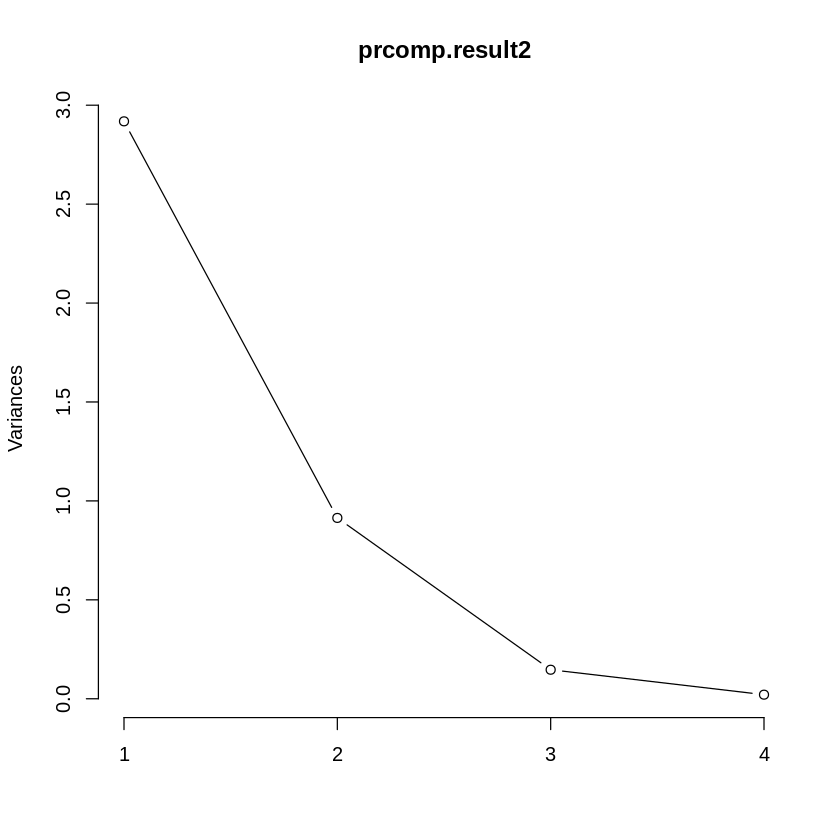

In [73]:
plot(prcomp.result2 , type = 'l')
summary(prcomp.result2)

```
                    PC1
Sepal.Length  0.5210659 
Sepal.Width  -0.2693474
Petal.Length  0.5804131
Petal.Width   0.5648565
```
- PC1 = 0.5038236 * Sepal.Length - 0.3023682 * Sepal.Width + 0.5767881 * Petal.Length + 0.5674952 * Petal.Width 변수라고 해석

In [75]:
prcomp.result2$rotation

,PC1,PC2,PC3,PC4
Sepal.Length,0.5210659,-0.37741762,0.7195664,0.2612863
Sepal.Width,-0.2693474,-0.92329566,-0.2443818,-0.1235096
Petal.Length,0.5804131,-0.02449161,-0.1421264,-0.8014492
Petal.Width,0.5648565,-0.06694199,-0.6342727,0.5235971


In [76]:
head(iris2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [78]:
newResult <- as.matrix(iris2) %*% prcomp.result2$rotation
head(newResult)

PC1,PC2,PC3,PC4
2.640270,-5.204041,2.488621,-0.1170332
2.670730,-4.666910,2.466898,-0.1075356
2.454606,-4.773636,2.288321,-0.1043499
2.545517,-4.648463,2.212378,-0.2784174
2.561228,-5.258629,2.392226,-0.1555127
2.975946,-5.707321,2.437245,-0.2237665


In [81]:
# 이를 기반으로 예측모델 만들기
final2 <- cbind(ir.species, as.data.frame(newResult))
final2[,1] <- as.factor(final2[,1])
colnames(final2)[1] <- "label"
head(final2)

,label,PC1,PC2,PC3,PC4
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,setosa,2.640270,-5.204041,2.488621,-0.1170332
2,setosa,2.670730,-4.666910,2.466898,-0.1075356
3,setosa,2.454606,-4.773636,2.288321,-0.1043499
4,setosa,2.545517,-4.648463,2.212378,-0.2784174
5,setosa,2.561228,-5.258629,2.392226,-0.1555127
6,setosa,2.975946,-5.707321,2.437245,-0.2237665


In [83]:
fit2 <- lm(label~ PC1 + PC2 , data = final2)
fit2_pred <- predict(fit2 , newdata = final2)
b2 <- round(fit2_pred)
a2 <- ir.species
table(b2, a2)

Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”
Warning message in Ops.factor(y, z$residuals):
“‘-’ not meaningful for factors”


   a2
b2  setosa versicolor virginica
  1     50          0         0
  2      0         44         5
  3      0          6        45

### 3) 인자분석
#### 특징
- 여러 개의 서로 관련이 있는 변수들로 구성된 데이터 에서, 이 변수를 설명 할 수 있는 새로운 공통 변수를 파악하는 통계적 분석 방법
    - ex) 학생 100명을 대상으로 국어, 영어, 수학, 사회, 역사, 물리, 화학, 지구과학, 생물의 9개 과목에 대한 시험을 실시하여 성적을 구했을 때, 전체 데이터를 설명할 수 있는 공통인자(변수)를 파악하는 것

    | 신규변수 	| 포함변수 	|
    |-	|-	|
    | 언어능력 	| 국어, 영어 	|
    | 수리능력 	| 수학, 물리, 화학 	|
    | 인지능력 	| 사회, 역사, 지구과학, 생물 	|

    - 9개의 데이터를 3개의 공통인자(변수)로 분리해 내는 것
    - 인자 분석은 9개의 변수를 각 분야를 대표하는 3개의 변수로 축소하는 과정이라고
말할수있음

- 주성분분석과 비교
    | 비교 	| 설명 	|
    |-	|-	|
    | 공통점 	| 데이터를 구성하는 여러 개의 변수로 부터 적은 수의 새로운 변수를 생성 	|
    | 차이점 	| 주성분 분석은 각 변수들이 중요성이 다름 	|
    | 차이점 	| 인자 분석은 변수들이 기본적으로 대등한 관계를 가짐 	|

#### 추정방법 
- 주성분인자법 (Principle Factor Method):
    관측 값의 분산, 공분산 행렬 또는 상관 계수 행렬의 고유근과 고유 벡터를 이용하여 인자 부하 값과 특수 분산을 추정하는 방법

- 최우추정법 (Maximum Likelihood Method):
    관측값이 다변량 정규 분포를 따른다는 가정에 기반하여 추정하며, 추정의 신뢰성이 높아서 많이 사용되는 방법

#### 특징
- 인자수와 유의성 판단기준
    인자분석에서 인자는 상관계수 행렬R의 고유값이 1이상인 경우에 채택 
    인자의 유의성은 아래의 기준을 따름
    - 요인부하값>0.3:유의함
    - 요인부하값>0.4:좀더유의함 
    - 요인부하값>0.5:아주유의함

- 요인회전
    - 직교회전:VARIMAX,QUARMAX등
    - 사각회전:COVARIMAX,QUARTMIN,OBLIMIN등

#### R을 이용한 실습 과정 
1. 데이터 읽기
2. 요인분석 수행
3. 요인의 상관계수 고유값 출력
4. 요인개수 정하기 5. 요인회전 수행
6. 요인분석결과 그림 표시
            
| 명령어 	| 설명 	|
|-	|-	|
| principal() 	| 요인분석 수행 	|
| biplot() 	| 요인분석 결과 그림으로 표시 	|

In [84]:
FactorData <- read.table("data/FactorData.txt", header=T)
head(FactorData) 

,lung,muscle,liver,skeleton,kidneys,heart,step,stamina,stretch,blow,urine
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,20,16,52,10,24,23,19,20,23,29,67
2,24,16,52,7,27,16,16,15,31,33,59
3,19,21,57,18,22,23,16,19,42,40,61
4,24,21,62,12,31,25,17,17,36,36,77
5,29,18,62,14,26,27,15,20,33,29,88
6,18,19,51,15,29,23,19,20,50,37,54


In [85]:
install.packages(c('psych','GPArotation'))
library(psych) 
library(GPArotation)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [86]:
FactorResult <- principal(FactorData, rotat="none")
FactorResult

Principal Components Analysis
Call: principal(r = FactorData, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
          PC1    h2   u2 com
lung     0.60 0.366 0.63   1
muscle   0.32 0.102 0.90   1
liver    0.70 0.490 0.51   1
skeleton 0.58 0.341 0.66   1
kidneys  0.61 0.373 0.63   1
heart    0.47 0.220 0.78   1
step     0.67 0.449 0.55   1
stamina  0.48 0.234 0.77   1
stretch  0.64 0.407 0.59   1
blow     0.59 0.344 0.66   1
urine    0.23 0.054 0.95   1

                PC1
SS loadings    3.38
Proportion Var 0.31

Mean item complexity =  1
Test of the hypothesis that 1 component is sufficient.

The root mean square of the residuals (RMSR) is  0.12 
 with the empirical chi square  211.09  with prob <  1.1e-23 

Fit based upon off diagonal values = 0.78

[1] 3.3791814 1.4827707 1.2506302 0.9804771 0.7688022 0.7330511 0.6403994
 [8] 0.6221934 0.5283718 0.3519301 0.2621928

[1] "values"       "rotation"     "n.obs"        "communality"  "loadings"    
 [6] "fit"          "fit.off"      "fn"           "Call"         "uniquenesses"
[11] "complexity"   "chi"          "EPVAL"        "R2"           "objective"   
[16] "residual"     "rms"          "factors"      "dof"          "null.dof"    
[21] "null.model"   "criteria"     "STATISTIC"    "PVAL"         "weights"     
[26] "r.scores"     "Vaccounted"   "Structure"    "scores"

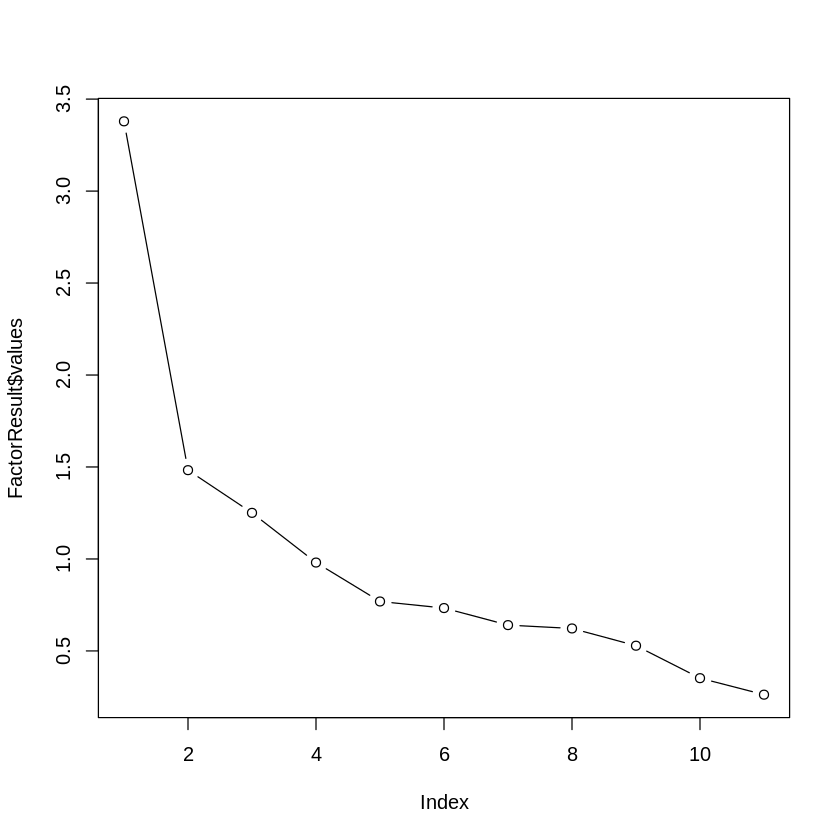

In [87]:
FactorResult$value
names(FactorResult)
plot(FactorResult$values, type="b")

In [88]:
FactorVariable.varimax <- principal(FactorData, nfactors=3, rotate="varimax")
FactorVariable.varimax

Principal Components Analysis
Call: principal(r = FactorData, nfactors = 3, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
           RC1   RC2   RC3   h2   u2 com
lung      0.66  0.12  0.16 0.47 0.53 1.2
muscle    0.11 -0.09  0.79 0.64 0.36 1.1
liver     0.78  0.13  0.17 0.66 0.34 1.1
skeleton  0.19  0.29  0.76 0.70 0.30 1.4
kidneys   0.73  0.23 -0.14 0.61 0.39 1.3
heart     0.65 -0.11  0.19 0.46 0.54 1.2
step      0.49  0.48  0.10 0.48 0.52 2.1
stamina   0.02  0.62  0.29 0.47 0.53 1.4
stretch   0.18  0.65  0.34 0.57 0.43 1.7
blow      0.26  0.70 -0.04 0.56 0.44 1.3
urine    -0.07  0.65 -0.28 0.50 0.50 1.4

                       RC1  RC2  RC3
SS loadings           2.39 2.13 1.59
Proportion Var        0.22 0.19 0.14
Cumulative Var        0.22 0.41 0.56
Proportion Explained  0.39 0.35 0.26
Cumulative Proportion 0.39 0.74 1.00

Mean item complexity =  1.4
Test of the hypothesis that 3 components are sufficient.

The root mean square of the resid

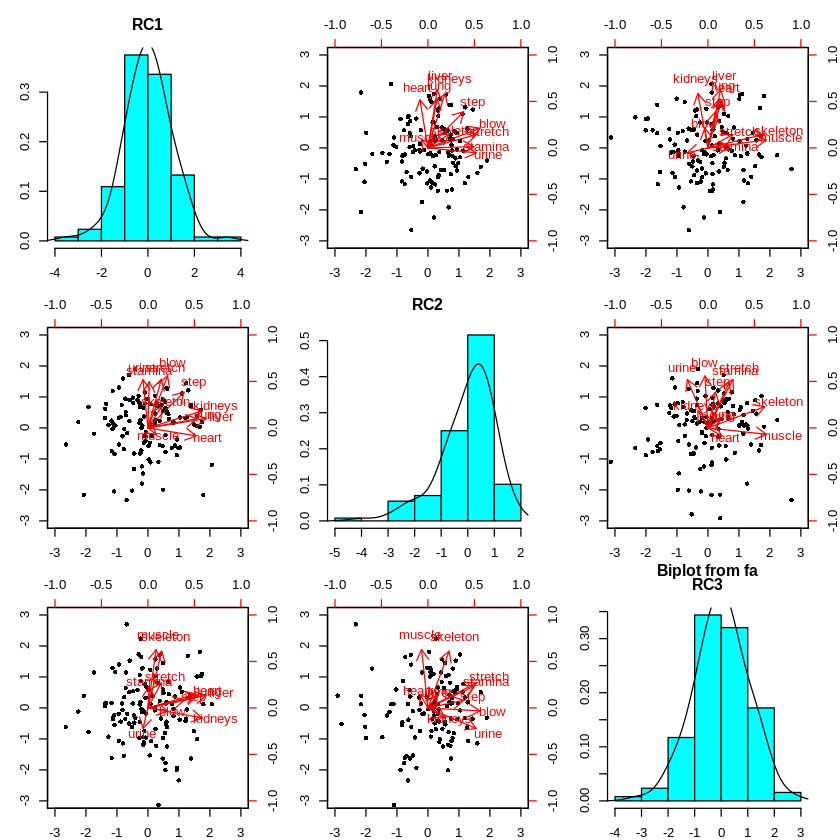

In [89]:
biplot(FactorVariable.varimax)

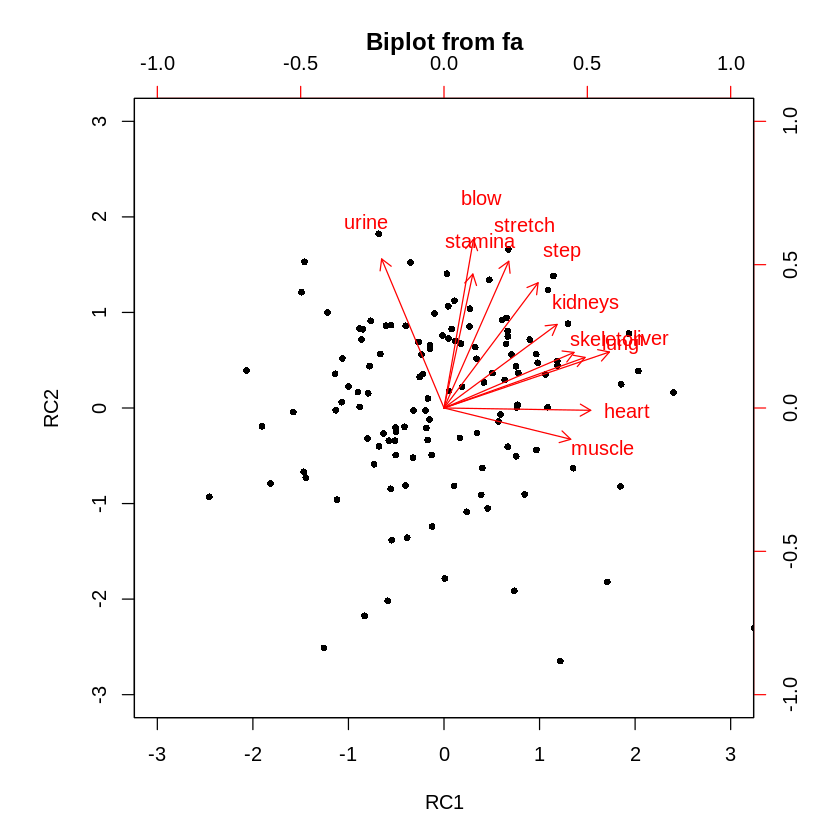

In [90]:
Factor.varimax2 <- principal(FactorData, nfactors=2, rotate="varimax")
biplot(Factor.varimax2)